# 因子分析を用いた知覚マップ作成

## 0. はじめに
### 0.1. ゴール
アンケートデータからビール市場における知覚マップを作成して，自社商品のポジショニングを見てみます．競合の商品と比較して，今後とるべきマーケティング戦略まで考えよう！
### 0.2. データ
アサヒ，キリン，サッポロ，エビス，サントリーの5社の商品（計10品）を対象とした，6つの項目に関するアンケートデータを使います．（各項目は5段階評価）なお、分析に使用するデータは事前に商品ごとの平均値で集計されています．

- **アサヒ**
 - アサヒスーパードライ
 - アサヒ本生ドラフト
- **キリン**
 - キリンラガービール
 - キリン一番絞り
 - 麒麟淡麗<生>
 - キリンのどごし
- **サッポロ**
 - サッポロ生ビール黒ラベル
- **エビス**
 - エビスビール
- **サントリー**
 - サントリー・ザ・プレミアムモルツ
 - サントリー金麦
 
### 0.3. 分析の流れ
**1. データの読み込み**
: 分析で使うデータがどんなデータなのかを確認します．

**2. データの前処理**
: 因子分析をするために，必要な処理をしていきます．

**3. 因子分析**
: 因子を見つけにいきます．

**4. 結果の解釈**
: 商品ごとに因子を見ていき，知覚マップを作成します．

## 1. データの読み込み

In [6]:
import pandas as pd
df = pd.read_csv('Beerdata.csv')
df.head()

,商品名,喉越しが良い,香りが良い,味が良い,幸せな気分になる,ほっとした気分になる,爽快な気分になる
0,アサヒスーパードライ,4.08,3.47,3.72,3.53,3.42,3.90
1,キリンラガービール,3.72,3.70,3.73,3.53,3.54,3.58
2,キリン一番絞り,3.97,3.93,4.00,3.76,3.75,3.80
3,サッポロ生ビール黒ラベル,3.68,3.68,3.68,3.55,3.56,3.56
4,エビスビール,3.85,4.08,4.09,3.90,3.81,3.60


## 2. データの前処理
### 2.1. 分析に必要なデータを抽出
因子分析ではアンケートの評価データ（数値）だけを使うので，商品名を抜いたデータを作成します．特定の列を削除する場合には```drop()```を使います．列を削除するので，```axis = 1```です．行を操作する場合には，```axis = 0 ```です．

In [7]:
df2 = df.drop('商品名', axis = 1)
df2.head()

,喉越しが良い,香りが良い,味が良い,幸せな気分になる,ほっとした気分になる,爽快な気分になる
0,4.08,3.47,3.72,3.53,3.42,3.90
1,3.72,3.70,3.73,3.53,3.54,3.58
2,3.97,3.93,4.00,3.76,3.75,3.80
3,3.68,3.68,3.68,3.55,3.56,3.56
4,3.85,4.08,4.09,3.90,3.81,3.60


### 2.2. 相関行列から固有値を算出
因子分析ではまず，各アンケート項目の固有値を計算することが必要になります．この固有値は各アンケート項目間の相関を示す相関行列から算出されます．相関行列は```corr()```で計算されます．

In [8]:
#相関行列
cor = df2.corr()
cor

,喉越しが良い,香りが良い,味が良い,幸せな気分になる,ほっとした気分になる,爽快な気分になる
喉越しが良い,1.000000,0.623354,0.778155,0.716951,0.630211,0.978844
香りが良い,0.623354,1.000000,0.971400,0.977696,0.988987,0.587296
味が良い,0.778155,0.971400,1.000000,0.980141,0.957853,0.743062
幸せな気分になる,0.716951,0.977696,0.980141,1.000000,0.983663,0.686996
ほっとした気分になる,0.630211,0.988987,0.957853,0.983663,1.000000,0.603937
爽快な気分になる,0.978844,0.587296,0.743062,0.686996,0.603937,1.000000


相関行列は数字がごちゃごちゃして見づらいですよね．そんな時にはヒートマップで可視化してあげます．```seaborn```ライブラリの```sns.heatmap()```で作成出来ます．引数などの詳細は[こちら](https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d)を参考にどうぞ．

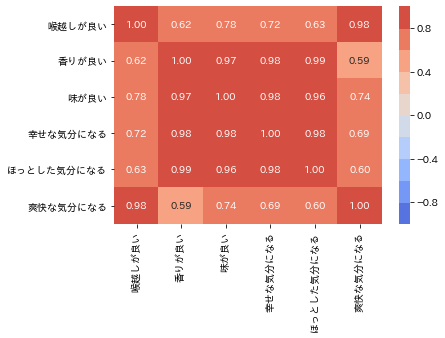

In [10]:
# 相関行列の可視化
import seaborn as sns
import japanize_matplotlib
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

相関行列から固有値を計算していきます．

In [11]:
# 必要なライブラリのインポート
import numpy as np
from numpy import linalg as LA
# 相関行列から固有値の算出
eigenv = LA.eigvals(cor)
eigenv

array([5.09068399e+00, 8.51302659e-01, 3.02191631e-02, 1.63721947e-02,
       9.97716606e-03, 1.44483066e-03])

### 2.3. 因子数の決定
今回はスクリープロットという方法で因子の数を決めていきます．固有値をプロットしてみて，ガクッと下がっている数あるいは1を下回る数が最適な因子の数です．```matplotlib```ライブラリの```plot()```コマンドでグラフを作成出来ます．```hline()```でy=1の直線を引いています．

Text(0, 0.5, '固有値')

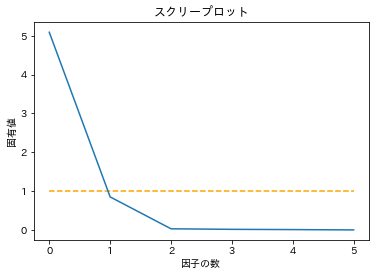

In [15]:
import matplotlib.pyplot as plt
plt.plot(eigenv)
plt.hlines([1], 0, 5, 'orange', linestyles='dashed')
plt.title('スクリープロット')
plt.xlabel('因子の数')
plt.ylabel('固有値')

**Pythonは0から始まることに注意してください！**グラフのx軸を見てみると1でガクッと下がり，かつ1を下回っているので，因子の数は2個が最適そうですね．

## 3. 因子分析
### 3.1. 正規化
因子分析では，データは標準正規分布に従っているとするので、データを標準正規化します．いろいろ方法はありますが，今回は```sklearn.preprocessing```の```scale```という関数を使用します．

In [16]:
from sklearn.preprocessing import scale
df_scaled = scale(df2)

### 3.2. 因子負荷量の算出
やっと因子分析です！各アンケート項目に対して因子負荷量を計算していきます．因子負荷量は各項目がどの程度因子の影響を受けているかを表しています．```FactorAnalyzer```を使うと因子分析をすることが出来ます．

In [50]:
from factor_analyzer import FactorAnalyzer
fa_promax =FactorAnalyzer(n_factors=2, rotation='promax')
fa_promax_fit = fa_promax.fit(df_scaled)
fa_promax.loadings_

array([[ 0.02614919,  0.98055027],
       [ 1.0500065 , -0.08220676],
       [ 0.83843629,  0.21401593],
       [ 0.92736707,  0.09598593],
       [ 1.02792171, -0.05652388],
       [-0.01107051,  0.98815103]])

### 3.3. 因子の解釈

因子負荷量を可視化して，それぞれの因子に名前をつけてみましょう．ここでマーケターのセンスが問われます．

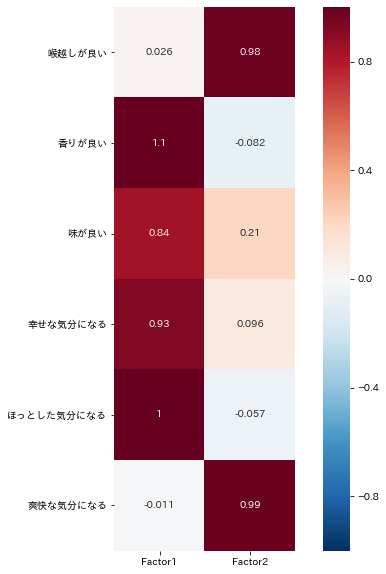

In [51]:
import seaborn as sns
column = df2.columns
plt.figure(figsize=(10, 10))
sns.heatmap(data=fa_promax.loadings_,
                square=True, vmax=1, vmin=-1, center=0, annot=True,
            cmap='RdBu_r',yticklabels=column, xticklabels=["Factor1","Factor2"])

別の可視化の方法もあります

In [54]:
result_promax = pd.DataFrame(fa_promax.loadings_, index = column, columns = ["Factor1","Factor2"])
import seaborn as sns
cm = sns.light_palette("skyblue", as_cmap=True)
result_promax.style.background_gradient(cmap=cm)

,Factor1,Factor2
喉越しが良い,0.0261492,0.98055
香りが良い,1.05001,-0.0822068
味が良い,0.838436,0.214016
幸せな気分になる,0.927367,0.0959859
ほっとした気分になる,1.02792,-0.0565239
爽快な気分になる,-0.0110705,0.988151


### バリマックス回転 ver.

In [60]:
fa_varimax =FactorAnalyzer(n_factors=2, rotation='varimax')
fa_varimax_fit = fa_varimax.fit(df_scaled)
result_varimax = pd.DataFrame(fa_varimax.loadings_, index = column, columns = ["Factor1","Factor2"])
result_varimax.style.background_gradient(cmap=cm)

,Factor1,Factor2
喉越しが良い,0.372827,0.925669
香りが良い,0.955722,0.28708
味が良い,0.862486,0.490656
幸せな気分になる,0.90398,0.411146
ほっとした気分になる,0.944129,0.303433
爽快な気分になる,0.340615,0.919874


## 4. 結果の解釈：知覚マップ作成
### 4.1. 因子得点の算出

プロマックス回転

In [55]:
score_promax = fa_promax.transform(df_scaled)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [56]:
df_promax = pd.DataFrame(score_promax, columns = ["Factor1", "Factor2"])
df_promax.head()

,Factor1,Factor2
0,-0.258997,1.558478
1,0.221555,-0.148181
2,1.004209,1.061506
3,0.217976,-0.309020
4,1.519649,0.419695


In [57]:
df_promax2 = pd.concat([df.商品名, df_promax], axis = 1)
df_promax2

,商品名,Factor1,Factor2
0,アサヒスーパードライ,-0.258997,1.558478
1,キリンラガービール,0.221555,-0.148181
2,キリン一番絞り,1.004209,1.061506
3,サッポロ生ビール黒ラベル,0.217976,-0.309020
4,エビスビール,1.519649,0.419695
5,サントリー・ザ・プレミアムモルツ,1.465437,0.991396
6,アサヒ本生ドラフト,-1.051923,-0.981390
7,麒麟淡麗<生>,-1.020276,-0.056787
8,キリンのどごし,-0.935418,-0.576605
9,サントリー金麦,-1.162212,-1.959094


バリマックス回転

In [59]:
score_varimax = fa_varimax.transform(df_scaled)
df_varimax = pd.DataFrame(score_varimax, columns = ["Factor1", "Factor2"])
df_varimax2 = pd.concat([df.商品名, df_varimax], axis = 1)
df_varimax2

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


,商品名,Factor1,Factor2
0,アサヒスーパードライ,-1.037856,2.061573
1,キリンラガービール,0.342914,-0.288821
2,キリン一番絞り,0.757312,0.847790
3,サッポロ生ビール黒ラベル,0.412435,-0.487298
4,エビスビール,1.691695,-0.193850
5,サントリー・ザ・プレミアムモルツ,1.361572,0.543177
6,アサヒ本生ドラフト,-0.853328,-0.725599
7,麒麟淡麗<生>,-1.239246,0.410150
8,キリンのどごし,-0.894972,-0.276752
9,サントリー金麦,-0.540525,-1.890371


### 4.2. 知覚マップ作成

プロマックス回転

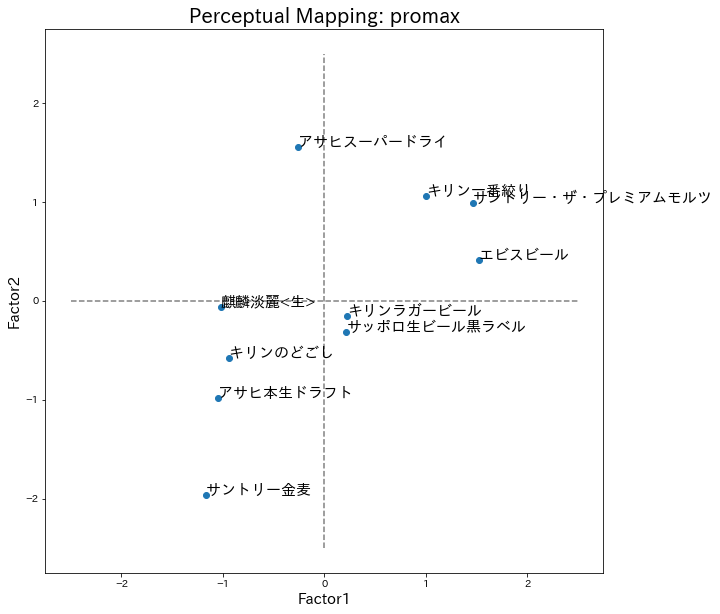

In [95]:
plt.figure(figsize=(10, 10))
plt.plot(df_promax2.Factor1, df_promax2.Factor2, "o")
plt.hlines([0], -2.5, 2.5, 'gray', linestyles='dashed')
plt.vlines([0], -2.5, 2.5, 'gray', linestyles='dashed')
plt.xlabel('Factor1',size = 15)
plt.ylabel('Factor2',size = 15)
plt.title('Perceptual Mapping: promax',size = 20)

for i in range(len(df_varimax2)) :
    plt.text(df_promax2.iloc[i,1],df_promax2.iloc[i,2],df_promax2.iloc[i,0], size = 15)

バリマックス回転

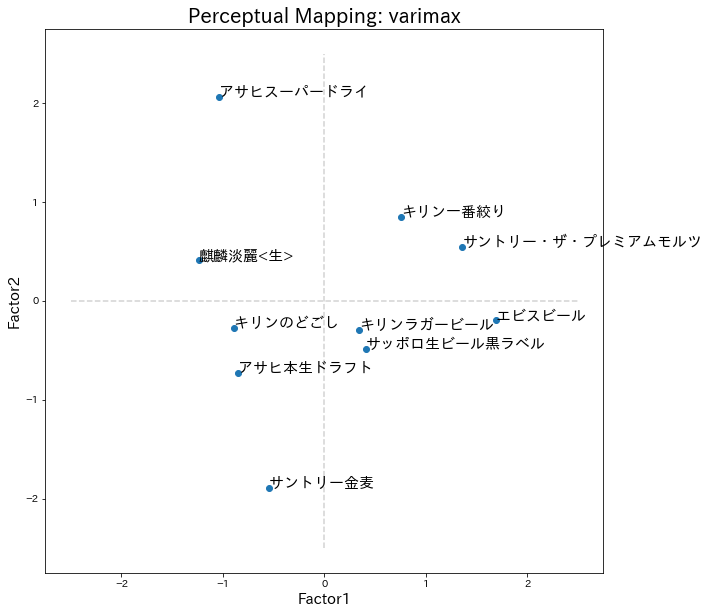

In [94]:
plt.figure(figsize=(10, 10))
plt.plot(df_varimax2.Factor1, df_varimax2.Factor2, "o")
plt.hlines([0], -2.5, 2.5, 'lightgray', linestyles='dashed')
plt.vlines([0], -2.5, 2.5, 'lightgray', linestyles='dashed')
plt.xlabel('Factor1', size = 15)
plt.ylabel('Factor2', size = 15)
plt.title('Perceptual Mapping: varimax', size = 20)

for i in range(len(df_varimax2)) :
    plt.text(df_varimax2.iloc[i,1],df_varimax2.iloc[i,2],df_varimax2.iloc[i,0], size = 15)

### よく出てくるfig, axを使って書いてみる。

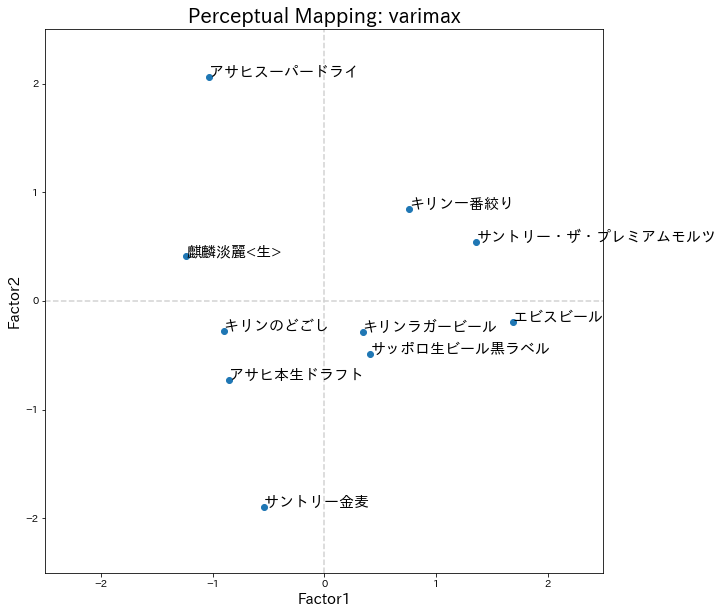

In [112]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
ax.plot(df_varimax2.Factor1, df_varimax2.Factor2, "o")
ax.set_xlabel('Factor1', size = 15)
ax.set_ylabel('Factor2', size = 15)
ax.set_title('Perceptual Mapping: varimax', size = 20)
ax.axhline(0, ls = '--', color = 'lightgray')
ax.axvline(0, ls = '--', color = 'lightgray')

for i in range(len(df_varimax2)) :
    ax.text(df_varimax2.iloc[i,1],df_varimax2.iloc[i,2],df_varimax2.iloc[i,0], size = 15)